### 📖 Background
The Board human capital department of a large corporation is worried about  high turnover of their employees , and they set an objective to to reduce the number of employees leaving the company. The HR department wants to know which employees are more likely to leave, and why. What are the features that impact employee churn. 

### 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

#### 💪 Questions to follow ?
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

### Imports

In [99]:
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Loading Data

In [101]:
#loading data from a csv file 
df = pd.read_csv('../data/raw_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [103]:
# check summary statistics about the dataset 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
promoted,9540.0,0.030294,0.171403,0.00000,0.000000,0.000000,0.000000,1.000000
review,9540.0,0.651826,0.085307,0.31000,0.592884,0.647456,0.708379,1.000000
projects,9540.0,3.274843,0.579136,2.00000,3.000000,3.000000,4.000000,5.000000
tenure,9540.0,6.556184,1.415432,2.00000,5.000000,7.000000,8.000000,12.000000
satisfaction,9540.0,0.504645,0.158555,0.00000,0.386801,0.500786,0.622607,1.000000
bonus,9540.0,0.212055,0.408785,0.00000,0.000000,0.000000,0.000000,1.000000
avg_hrs_month,9540.0,184.661571,4.144831,171.37406,181.472085,184.628796,187.728708,200.861656


In [104]:
# Check missing values 
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

### Exploratory Data Analysis & Visualization 

In [106]:
# Percentage of churn 
size = df.shape[0]
left_yes  = (len(df[df.left=='yes'])/size) * 100 
left_no  = (len(df[df.left=='no'])/size)*100 
print(f'Percentage of Churned Employes: {left_yes:.2f} %')
print()
print(f'Percentage of Not-Churned Employes: {left_no:.2f} %')

Percentage of Churned Employes: 29.18 %

Percentage of Not-Churned Employes: 70.82 %


- Almost 30 % of employess left their company.   
- Can we predict if they'll leave or not?. How to reducte this percentage?

In [108]:
left = df.groupby('left')
left.mean(numeric_only =True)

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
left,,,,,,,
no,0.034340,0.635164,3.279455,6.546625,0.505634,0.215068,184.637605
yes,0.020474,0.692262,3.263649,6.579382,0.502244,0.204741,184.719730


Despite that the dataset is not balanced, the satisaction average in both sides looks the same. Additionally,  employees who left their company have a low promotion average score, meaning that they didn't get a promotion in the last two years like others who are still working. The employees who were promoted the last two years are less likely to leave than those who did not get promoted in the same period. 

#### Categorical Features vs Churn

##### 1. Churn vs Department

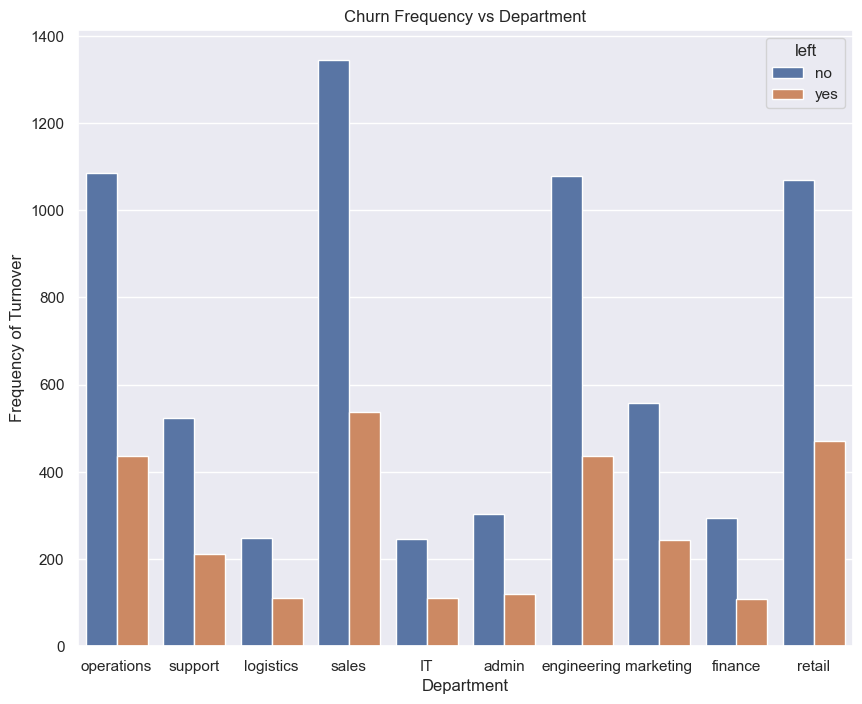

In [112]:
sb.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
sb.countplot(x='department',hue='left',data=df)
plt.title('Churn Frequency vs Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

Employess from dapartments of sales, retail, engeneering, and operations are more likely to leave the company. 

##### 2. Salary vs Churn 

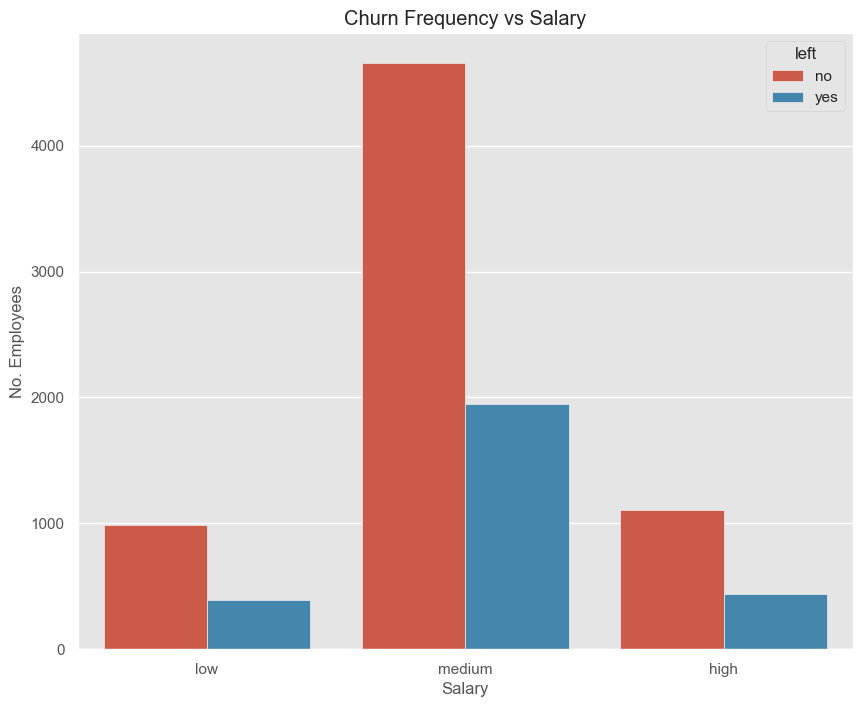

In [115]:
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
sb.countplot(x='salary',hue='left',data=df)
plt.title('Churn Frequency vs Salary')
plt.xlabel('Salary')
plt.ylabel('No. Employees')
plt.show()

Employees with medium salaries tend to leave company more than employess with low or high slaray. Churn also depends  on the salary level. Thus, informations about employess salary level will help us predicting the turnover outcome. 

#### Numerical Features vs Churn
The best way to check if there is any relationship between numeric variables and the target variables if to plot their historgams 

In [118]:
#  Column names 
cols = list(df.columns)
# Categorical columns
num_cols = list(df.select_dtypes(include=[np.number]).columns)
# Numerical columns
cat_cols = list(df.select_dtypes(exclude=[np.number]).columns)

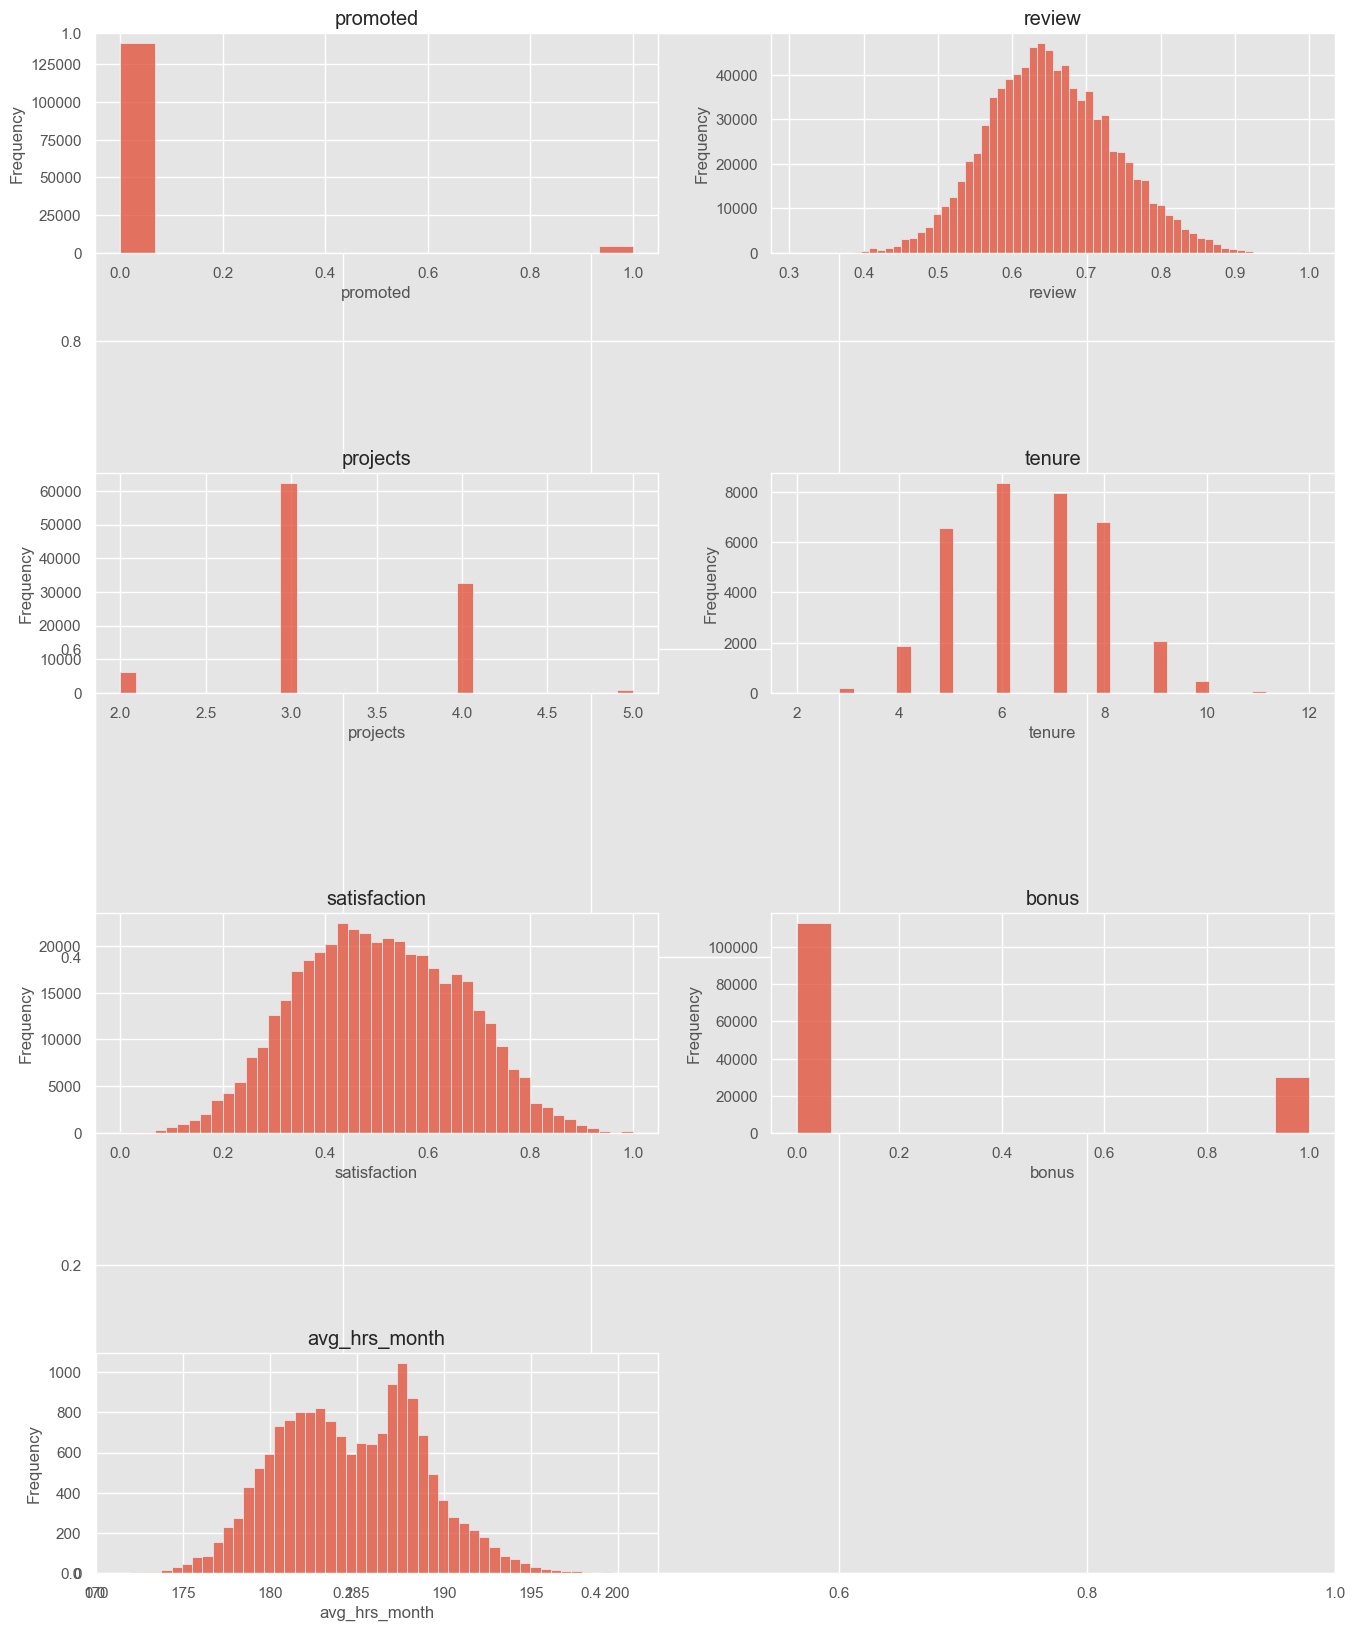

In [119]:
fig=plt.subplots(figsize=(16,20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.histplot(x=col,data = df,stat='frequency',multiple="dodge")
    plt.title(f"{col}")

Insights from the histograms:

* Most of the employees have 3 or 4 projects.
* Tenure (experience) of employess is normally distributed, and most of them spend between 5-9 years at their company.
* Satisfaction level is normally distributed. Most of the employess have a satisfaction level between 0.3 and 0.7. 
* The majority of employees didn't receive their bonus in the company. This might be another reason wich may lead them to leave. 
* The avergare of hours that employees worked per month is normally distributed ,and high frequencies lie between 180 and 190 hours per month. 

We will plot the same histograms, but this time we will hue them by the target variable (left) to see if there are any insights about reasons wich make employees to leave the company. 

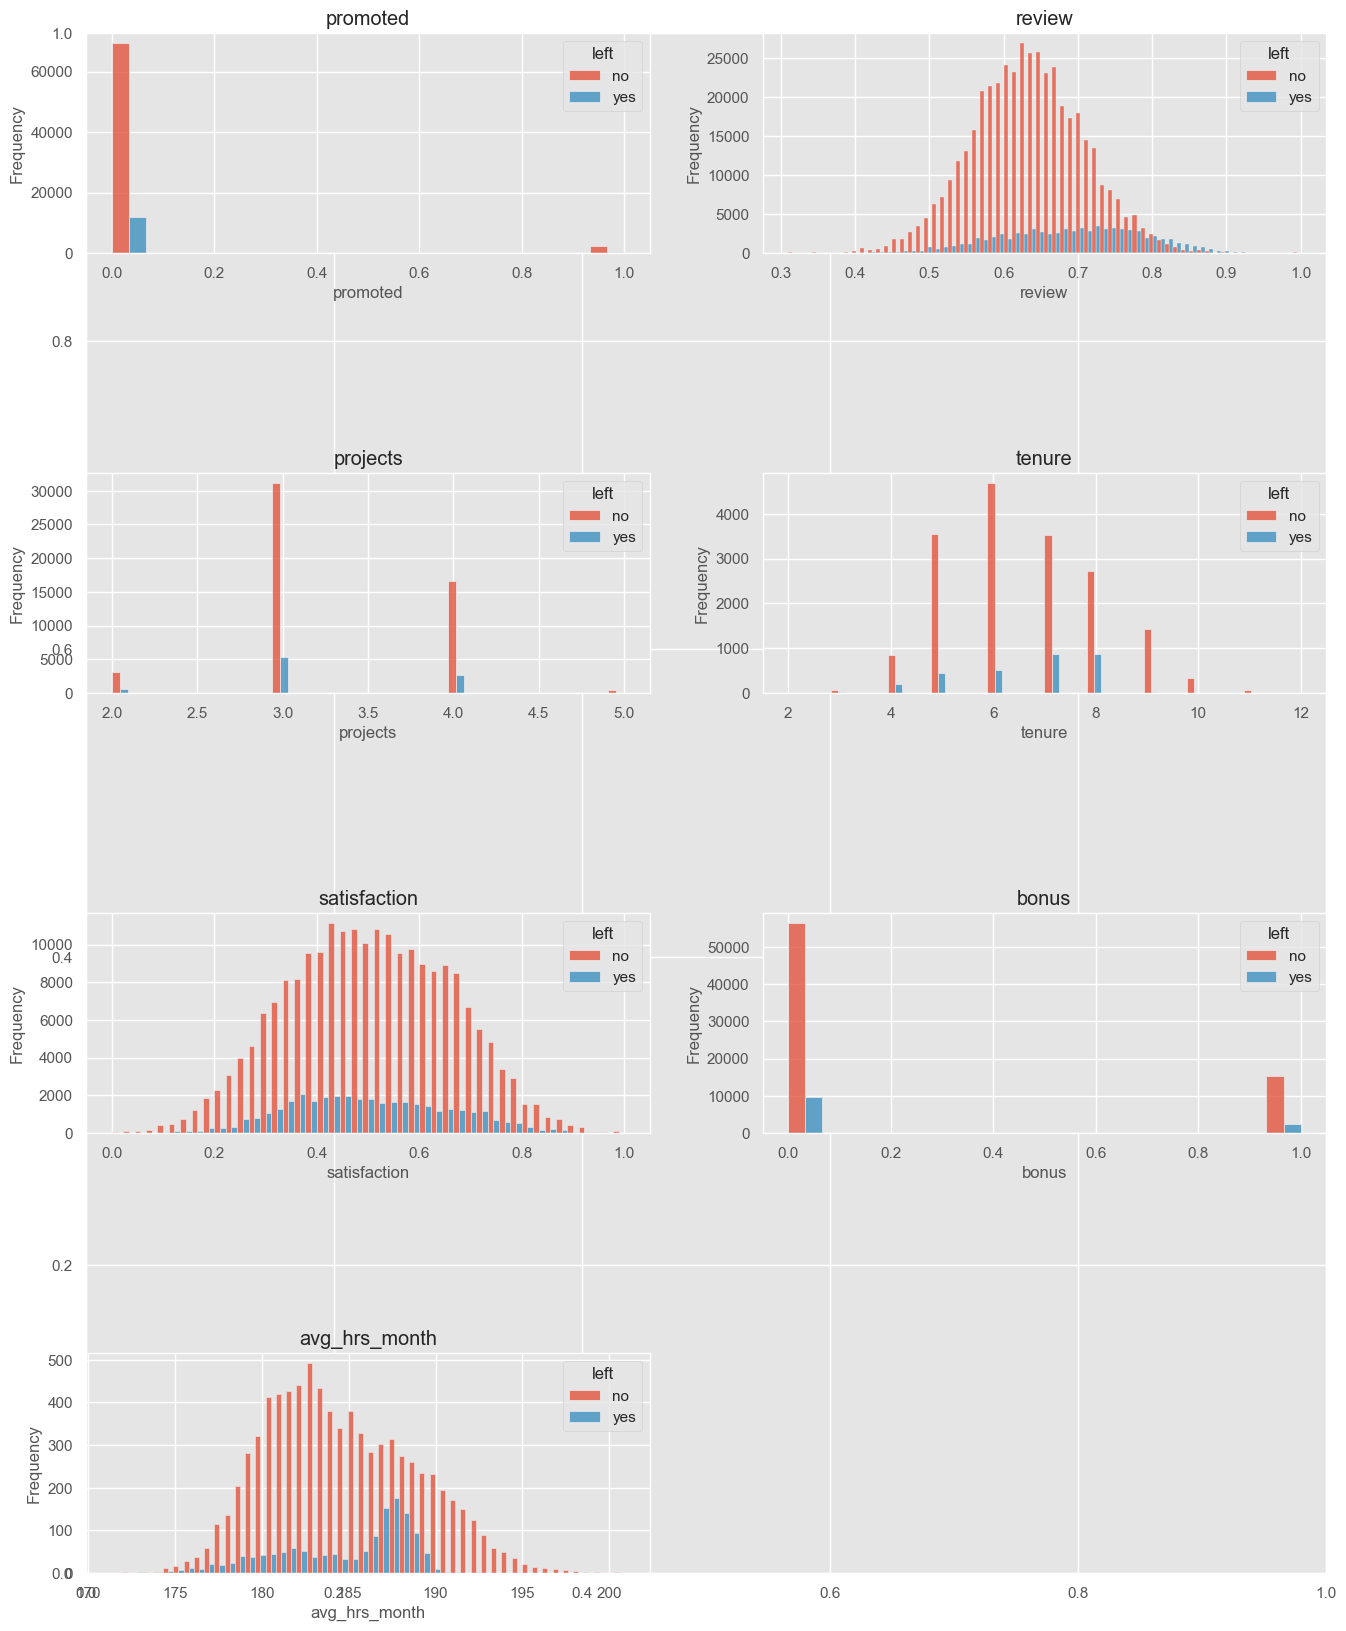

In [122]:
fig=plt.subplots(figsize=(16,20))
for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sb.histplot(x=col,data = df,hue='left',stat='frequency',multiple="dodge")
    plt.title(f"{col}")

Nothing to add to previous conclusions. The one thing to say here is that employess who left the company were overloaded with hours of work per month. Most of them didn't recievce a bonus. No one of them haven't worked in the company more than eight years. The majority who left didn't get any promotion.  

### Data Preprocessing

In [125]:
df.dtypes

department        object
promoted           int64
review           float64
projects           int64
salary            object
tenure           float64
satisfaction     float64
bonus              int64
avg_hrs_month    float64
left              object
dtype: object

In [126]:
# Encoding categorical variables 
encoder = LabelEncoder()
# Converting string labels into numerical values
df['left'] = df['left'].map({'yes':1,'no':0}).astype('int64')
df['salary'] = encoder.fit_transform(df['salary'])
df['department'] = encoder.fit_transform(df['department'])
# Display data after encoding 
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,6,0,0.577569,3,1,5.0,0.626759,0,180.866070,0
1,6,0,0.751900,3,2,6.0,0.443679,0,182.708149,0
2,9,0,0.722548,3,2,6.0,0.446823,0,184.416084,0
3,4,0,0.675158,4,0,8.0,0.440139,0,188.707545,0
4,8,0,0.676203,3,0,5.0,0.577607,1,179.821083,0


In [127]:
# Save preprocessed data
df.to_csv("../data/preprocessed_data.csv", index=False)
print("Data saved successefully!")

Data saved successefully!
